In [40]:
# -*- coding: utf-8 -*-
"""
TRABAJO 2
Nombre Estudiante: Francisco Javier Sáez Maldonado
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


SAVE = False

# Fijamos la semilla
np.random.seed(1)

def wait():
    input("\n--- Pulsar tecla para continuar ---\n")
    
def to_numpy(func):
  """Decorador para convertir funciones a versión NumPy"""
  def numpy_func(w):
    return func(*w)

  return numpy_func

def generate_uniform_data(N, dim, ran):
    return np.random.uniform(ran[0],ran[1],(N,dim))

def generate_gaussian_data(N, dim, sigma):
    media = 0    
    out = np.zeros((N,dim),np.float64)        
    for i in range(N):
        # Para cada columna dim se emplea un sigma determinado. Es decir, para 
        # la primera columna (eje X) se usará una N(0,sqrt(sigma[0])) 
        # y para la segunda (eje Y) N(0,sqrt(sigma[1]))
        out[i,:] = np.random.normal(loc=media, scale=np.sqrt(sigma), size=dim)
    
    return out


def generate_line(interval):
    points = np.random.uniform(interval[0], interval[1], size=(2, 2))
    x1,x2 = points[0,0],points[1,0]
    y1,y2 = points[0,1],points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Calculo de la pendiente.
    b = y1 - a*x1       # Calculo del termino independiente.
    
    return a, b

def separador_ejercicio(ej):
    print("---------------------------------")
    print("\t {}".format(ej))
    print("---------------------------------")
    
def scatter_multiple(x,y = None,ws = None,labels = None,reg_titles = None ,xlabel_title = None , ylabel_title = None, title = ""):
    """
    Funcion que permite pintar puntos en el plano
    - x: datos
    - y: etiquetas (opcional)
    - w: vector con pesos de regresion (opcional)
    - labels: etiquetas para los puntos segun el modelo de regresion(opcional)
    - reg_titles : titulos para las rectas de regresion (opcional)
    - xlabel_title :  titulo para la etiqueta del eje x (opcional)
    - ylabel_title : titulo para la etiqueta del eje y (opcional)
    - title: Titulo del gráfico (opcional)
    - save : indica si se guardará el gráfico en memoria.

    Se crean dos casos para los modelos de regresión que no sean lineales, se utiliza el caso de 6 características
    """
    # Init subplot
    _, ax = plt.subplots()
    ax.set_xlabel(xlabel_title)
    ax.set_ylabel(ylabel_title)
    # Set plot margins
    xmin, xmax = np.min(1.1*x[:, 1]), np.max(1.1*x[:, 1])
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(1.1*np.min(x[:, 2]), np.max(1.1*x[:, 2]))
    # No classes given
    if y is None:
        ax.scatter(x[:, 1], x[:, 2],marker=".")

    # Classes given
    else:
        colors = {-1: 'green', 1: 'red'}
        # For each class
        for cls, name in [(-1, "Clase -1"), (1, "Clase 1")]:
            # Get points of that class
            class_points = x[np.where(y == cls)[0]]
            # Plot them
            ax.scatter(class_points[:, 1],
                        class_points[:, 2],
                        c = colors[cls],
                        label = name,
                        marker=".")

        # Plot regressions
        if ws is not None:
            # Get plot limits
            xmin, xmax = ax.get_xlim()
            ymin, ymax = ax.get_ylim()
            x = np.array([xmin, xmax])

            if reg_titles is None:
            # Plot regression results
                for w in ws:
                # Linear regression
                    if len(w) == 3:
                        ax.plot(x, (-w[1]*x - w[0])/w[2])
            else:
                for w,a in zip(ws,reg_titles):
                    # Linear regression
                    if len(w) == 3:
                        ax.plot(x, (-w[1]*x - w[0])/w[2],label=a)

    
    if y is not None or ws is not None:
        ax.legend()
  
    ax.set_title(title)

    if SAVE:
        plt.savefig("media/"+title+".pdf")
    plt.show() 

In [2]:
def scatter(X, y = None, fun = None, title='Gráfico', axis_labels = ['x','y'],regions = False,label = "Clasificador"):
    # Init graphic
    fig = plt.figure(figsize = (8, 6))
    plt.xlabel(axis_labels[0])
    plt.ylabel(axis_labels[1])
    plt.title(title)
    cmap = ListedColormap(['r', 'green'])
    
    # Set Plot limits
    xmin, xmax = np.min(X[:, 1]), np.max(X[:, 1])
    ymin, ymax = np.min(X[:, 2]), np.max(X[:, 2])
    
    scale_x = (xmax - xmin) * 0.01
    scale_y = (ymax - ymin) * 0.01
    plt.xlim(xmin - scale_x, xmax + scale_x)
    plt.ylim(ymin - scale_y, ymax + scale_y)
    
    # Labels
    if y is None:
        c = [1 for _ in range(len(X))]
    else:
        c = y
        
    # Plot points
    scatter = plt.scatter(X[:, 1], X[:, 2],s = 60,cmap = cmap, c = c,marker='.')
    # If we got labels, create label legend
    if y is not None:
        legend1 = plt.legend(
            *scatter.legend_elements(),
            title = "Clases",
            loc = "upper right")
    
    # If function is given
    if fun is not None:
        #Generate predictions grid
        xs, ys = np.meshgrid(np.linspace(xmin - scale_x, xmax + scale_x, 100),
                    np.linspace(ymin - scale_y, ymax + scale_y, 100))
        zs = fun(xs,ys)
        
        # Draw regions divided by fun
        if regions:
            reg = plt.contourf(xs,ys,zs,cmap = cmap, levels = 0,alpha = 0.1)
            #fig.colorbar(reg,aspect = 30,label = "f(x,y)")
            
        # Draw fun
        plt.contour(xs,ys,zs,levels = [0],colors = ['blue']).collections[0].set_label(label)
        # Add legend
        plt.legend()
        
        # Insert function legend on the plot
        if label is not None:
            plt.legend(loc = "lower right")
    
    # Insert label functions on the plot
    if y is not None:
        plt.gca().add_artist(legend1)
        
    
    # Save, only for report purposes.
    if SAVE:
        plt.savefig("media/"+name+".pdf")
        
    plt.show(block = False)

  

---------------------------------
	 Ejercicio 1.1
---------------------------------


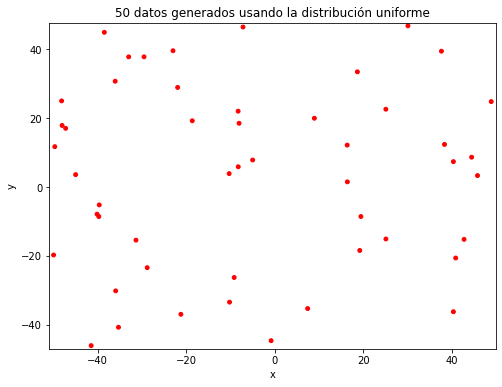


--- Pulsar tecla para continuar ---



In [3]:
# EJERCICIO 1.1: Dibujar una gráfica con la nube de puntos de salida correspondiente

separador_ejercicio("Ejercicio 1.1")

x = generate_uniform_data(50, 2, [-50,50])

x = np.hstack((np.ones((50, 1)), x))
#def scatter(X, y = None, fz = None, title='Gráfico', axis_labels = ['x','y'],regions = False,label = "Clasificador"):
 
scatter(x,title= "50 datos generados usando la distribución uniforme")

wait()

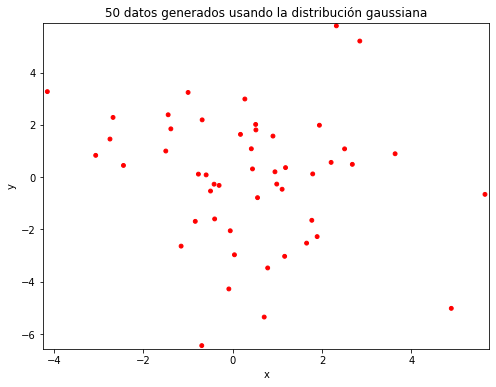


--- Pulsar tecla para continuar ---



In [4]:
x = generate_gaussian_data(50, 2, np.array([5,7]))
x = np.hstack((np.ones((50, 1)), x))
scatter(x,title= "50 datos generados usando la distribución gaussiana")


wait()

---------------------------------
	 Ejercicio 1.2
---------------------------------


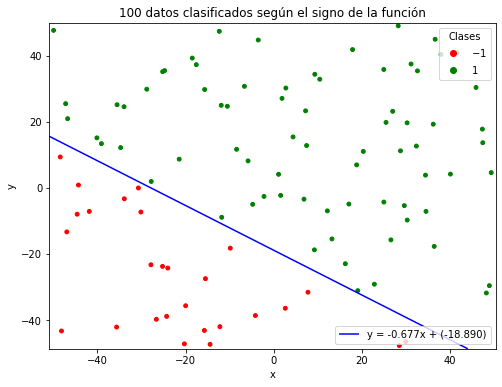


--- Pulsar tecla para continuar ---



In [5]:
###############################################################################
###############################################################################
###############################################################################


# EJERCICIO 1.2: Dibujar una gráfica con la nube de puntos de salida correspondiente

separador_ejercicio("Ejercicio 1.2")

# La funcion np.sign(0) da 0, lo que nos puede dar problemas
def sign(x):
    if x >= 0:
        return 1
    return -1

# Función usada para el ejercicio 1
def f(x, y, a, b):
    return sign(y - a*x - b)

    

# Generate data
X = generate_uniform_data(100,2,[-50,50])
a,b = generate_line([-50,50])
y = [f(x[0],x[1],a,b) for x in X]


X = np.hstack((np.ones((100, 1)), X))
# Inline function using a and b obtained by generate_line
line = lambda x,y: y-a*x-b

scatter(X,y,line,title= "100 datos clasificados según el signo de la función",label = "y = {:0.3f}x + ({:0.3f})".format(a, b))




wait()



---------------------------------
	 Ejercicio 1.2-b
---------------------------------


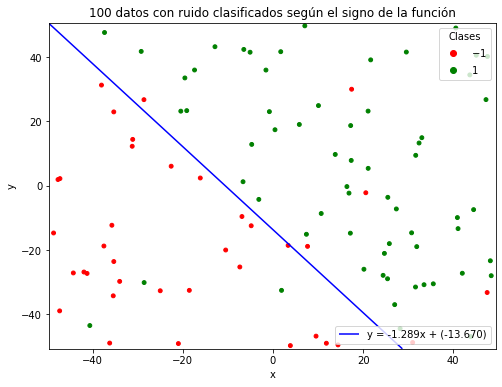


--- Pulsar tecla para continuar ---



In [6]:

separador_ejercicio("Ejercicio 1.2-b")

# 1.2.b. Dibujar una gráfica donde los puntos muestren el resultado de su etiqueta, junto con la recta usada para ello
# Array con 10% de indices aleatorios para introducir ruido



# Function that generates noise on a percentage of the labels
def generate_noise(y,per = 0.1):
    
    y_copy = np.copy(y)
    
    for label in {-1,1}:
        # Get index of labels
        idx = np.where(y==label)[0]
        # Random selection of percentage*length labels
        changes = np.random.choice(idx,int(per*len(idx)),replace=False)
        # Change labels
        y_copy[changes] = -label
        
    return y_copy

X = generate_uniform_data(100,2,[-50,50])
a,b = generate_line([-50,50])
y = np.array([f(x[0],x[1],a,b) for x in X])

y_noise = generate_noise(y,0.1)  



X = np.hstack((np.ones((100, 1)), X))
# Inline function using a and b obtained by generate_line
line = lambda x,y: y-a*x-b

scatter(X,y_noise,line,title= "100 datos con ruido clasificados según el signo de la función",label = "y = {:0.3f}x + ({:0.3f})".format(a, b))
wait()



---------------------------------
	 Ejercicio 1.3
---------------------------------


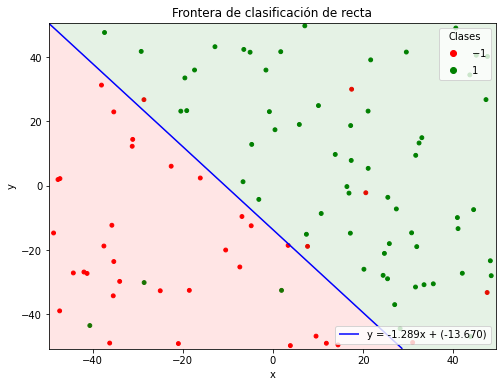

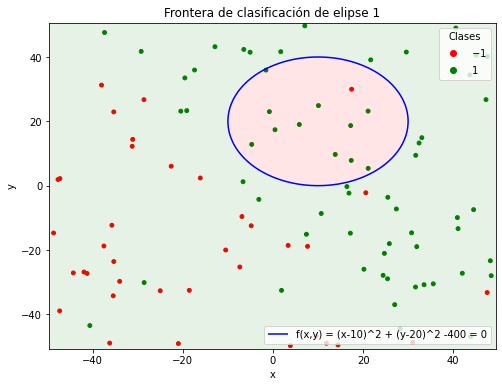

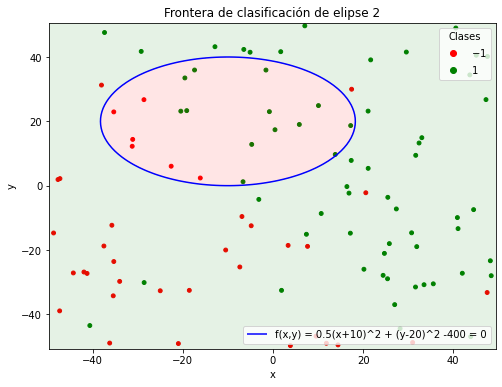

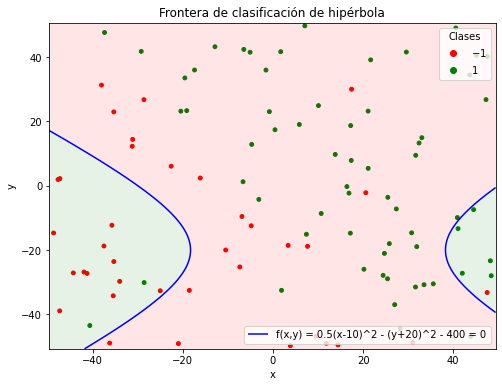

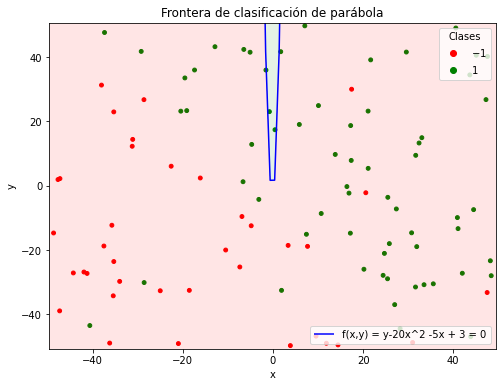


--- Pulsar tecla para continuar ---



In [7]:
###############################################################################
###############################################################################
###############################################################################

separador_ejercicio("Ejercicio 1.3")

# EJERCICIO 1.3: Supongamos ahora que las siguientes funciones definen la frontera de clasificación de los puntos de la muestra en lugar de una recta
functions = [line,
             lambda x,y: (x-10)**2 + (y-20)**2 -400,
             lambda x,y: 0.5*(x+10)**2 + (y-20)**2 -400,
             lambda x,y: 0.5*(x-10)**2 - (y+20)**2 - 400,
             lambda x,y: y-20*x**2 -5*x + 3]
names = ["y = {:0.3f}x + ({:0.3f})".format(a,b),
         "f(x,y) = (x-10)^2 + (y-20)^2 -400 = 0",
         "f(x,y) = 0.5(x+10)^2 + (y-20)^2 -400 = 0",
         "f(x,y) = 0.5(x-10)^2 - (y+20)^2 - 400 = 0",
         "f(x,y) = y-20x^2 -5x + 3 = 0"]

geo_names = ["recta","elipse 1", "elipse 2", "hipérbola", "parábola"]


for func,name,geo_name in zip(functions,names,geo_names):
    scatter(X,y_noise,func,regions = True,title= "Frontera de clasificación de {}".format(geo_name),label = name)

    

wait()



In [8]:

from sklearn.metrics import accuracy_score
for clas,name,geo_name in zip(functions,names,geo_names):
    y_predicted = [sign(clas(x[1],x[2])) for x in X]
    score = 100*accuracy_score(y_noise,y_predicted)
    print("La precisión de {} dada por {} es de {}%".format(geo_name,name,score))

La precisión de recta dada por y = -1.289x + (-13.670) es de 91.0%
La precisión de elipse 1 dada por f(x,y) = (x-10)^2 + (y-20)^2 -400 = 0 es de 53.0%
La precisión de elipse 2 dada por f(x,y) = 0.5(x+10)^2 + (y-20)^2 -400 = 0 es de 56.00000000000001%
La precisión de hipérbola dada por f(x,y) = 0.5(x-10)^2 - (y+20)^2 - 400 = 0 es de 30.0%
La precisión de parábola dada por f(x,y) = y-20x^2 -5x + 3 = 0 es de 39.0%


In [9]:
###############################################################################
###############################################################################
###############################################################################

separador_ejercicio("Ejercicio 2-a: Perceptron")

MAX_ITER = 1000

def PLA(X,y,initial_w,max_iter = MAX_ITER):
    
    w_t = initial_w.copy()
    all_w = [w_t]
    
    iterations = 0
    # Repeat max_it times
    for it in range(0,max_iter):
        
        # Control if w has changed
        update = False
        # Iteration in all the data
        for x,label in zip(X,y):
            
            # Predict using linear model
            pred = sign(x.dot(w_t))
            # Check label and update weights if neccesary
            
            if pred != label:
                w_t = w_t + label*x
                update = True
                
        if not update:
            break
                
        all_w.append(w_t.copy())
        iterations +=1
            

    
    return w_t,all_w,iterations

def predict(X,y,w):
    y_pred = [sign(x.dot(w)) for x in X]
    score = 100*accuracy_score(y,y_pred)
    return score
    

---------------------------------
	 Ejercicio 2-a: Perceptron
---------------------------------


In [10]:

# [0,0,0] vector
w,all_w,it = PLA(X,y,[0,0,0])
print("Iteraciones para peso inicial [0,0,0]: {}".format(it))
print("Accuracy = {}".format(predict(X,y,w)))

# Random inicializations
initial_weights = []
iterations = []
v_accuracy = []
for i in range(0,10):
    w0 = np.random.uniform(0,1,3)
    initial_weights.append(w0)
    #print("Pesos Iniciales: {}".format(w0))
    w_t,all_w,it = PLA(X,y,w0)
    iterations.append(it)
    v_accuracy.append(predict(X,y,w_t))
    

    
print('Valor medio de iteraciones necesario para converger: {}'.format(np.mean(np.array(iterations))))
print('Valor medio de accuracy en pesos aleatorios: {}'.format(np.mean(np.array(v_accuracy))))

Iteraciones para peso inicial [0,0,0]: 105
Accuracy = 100.0
Valor medio de iteraciones necesario para converger: 112.7
Valor medio de accuracy en pesos aleatorios: 100.0


In [11]:
# Ahora con los datos del ejercicio 1.2.b
separador_ejercicio("Ejercicio 2-a-2 : Datos con ruido")

# [0,0,0] vector
w,all_w,it = PLA(X,y_noise,[0,0,0])
print("Iteraciones para peso inicial [0,0,0]: {}".format(it))
print("Accuracy = {}".format(predict(X,y_noise,w)))

# Random inicializations
initial_weights = []
iterations = []
v_accuracy = []
print("Resultados medios para 10 pesos iniciales aleatorios:")
for i in range(0,10):
    w0 = np.random.uniform(0,1,3)
    initial_weights.append(w0)
    #print("Pesos Iniciales: {}".format(w0))
    w_t,all_w,it = PLA(X,y_noise,w0)
    iterations.append(it)
    v_accuracy.append(predict(X,y_noise,w_t))
    

    
print('\tIteraciones necesarias para converger: {}'.format(np.mean(np.array(iterations))))
print('\tAccuracy: {}'.format(np.mean(np.array(v_accuracy))))

---------------------------------
	 Ejercicio 2-a-2 : Datos con ruido
---------------------------------
Iteraciones para peso inicial [0,0,0]: 1000
Accuracy = 73.0
Resultados medios para 10 pesos iniciales aleatorios:
	Iteraciones necesarias para converger: 1000.0
	Accuracy: 85.5


In [49]:
###############################################################################
###############################################################################
###############################################################################

# EJERCICIO 3: REGRESIÓN LOGÍSTICA CON STOCHASTIC GRADIENT DESCENT

separador_ejercicio("Ejercicio 3: Regresión logística")

def err(X, y, w):
    """Error cometido en regresión logística"""

    return np.mean(np.log(1 + np.exp(-y * X.dot(w))))

def d_err(x, y, w):
    """Gradiente del error de regresión logística"""
    return -y * x / (1 + np.exp(y * x.dot(w)))



def sgdRL(X,y,eta = 0.01,epsilon = 0.01):
    # Neccesary vars
    w_t = np.zeros(X.shape[1])
    index = np.arange(X.shape[0])
    it = 0
    converged = False
    
    while not converged:
        w = w_t.copy()
        
        index = np.random.permutation(index)
        for idx in index:
            w_t -= eta*d_err(X[idx],y[idx],w_t)
            
        if np.linalg.norm(w_t - w) < epsilon:
            converged = True

        it +=1

    return w,it


    
def experiment(N_experiments = 100,N_train = 100,N_test = 1000):
    
    avg_iterations = []
    avg_error = []
    all_w = []
    for i in range(0,N_experiments):
        # Generate data and line
        a,b = generate_line([0,2])
        X = generate_uniform_data(N_train,2,[0,2])
        # Create tags using the line
        y = np.array([f(x[0],x[1],a,b) for x in X])
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Find w using sgdRL
        w,iterations = sgdRL(X,y)
        all_w.append(w)
        # Create data for eout
        X_test = generate_uniform_data(N_test,2,[0,2])
        y_test = np.array([f(x[0],x[1],a,b) for x in X_test])
        X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))
        # Evaluate w on test
        error = err(X_test,y_test,w)
        
        # Append results
        avg_iterations.append(iterations)
        avg_error.append(error)
        
        if N_experiments == 1:
            # def scatter_multiple(x,y = None,ws = None,labels = None,reg_titles = None ,xlabel_title = None , ylabel_title = None, title = ""):
            scatter_multiple(X,y,ws = [[-b,-a,1],w],reg_titles = ["Original line", "LR line"], title = "LR vs Original" )
        

    
        
    return np.array(avg_iterations),np.array(avg_error)




---------------------------------
	 Ejercicio 3: Regresión logística
---------------------------------


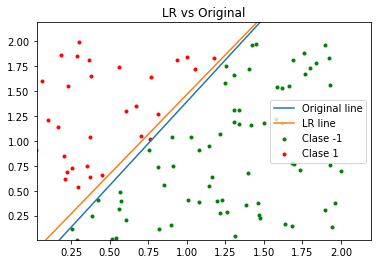

Average results in 1 experiments:
	 Iterations: 377.0
	 Error: 0.10318790025329579

--- Pulsar tecla para continuar ---



In [50]:
N_experiments = 1
iters,error = experiment(N_experiments = N_experiments)
print("Average results in {} experiments:".format(N_experiments))
print("\t Iterations: {}".format(np.mean(iters)))
print("\t Error: {}".format(np.mean(error)))

wait()

In [51]:
# Usar la muestra de datos etiquetada para encontrar nuestra solución g y estimar Eout
# usando para ello un número suficientemente grande de nuevas muestras (>999).

N_experiments = 100
iters,error = experiment(N_experiments = N_experiments)
print("Average results in {} experiments:".format(N_experiments))
print("\t Iterations: {}".format(np.mean(iters)))
print("\t Error: {}".format(np.mean(error)))

Average results in 100 experiments:
	 Iterations: 404.13
	 Error: 0.11725936143025502


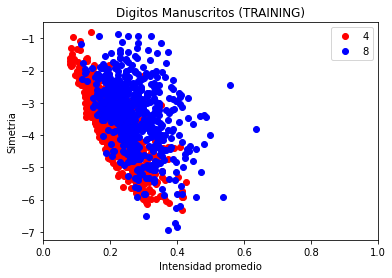

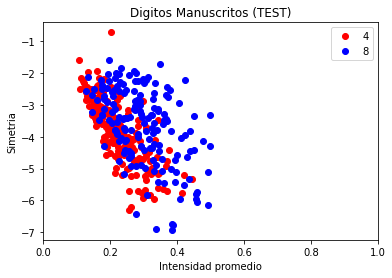


--- Pulsar tecla para continuar ---



In [53]:
###############################################################################
###############################################################################
###############################################################################
#BONUS: Clasificación de Dígitos


# Funcion para leer los datos
def readData(file_x, file_y, digits, labels):
    # Leemos los ficheros
    datax = np.load(file_x)
    datay = np.load(file_y)
    y = []
    x = []
    # Solo guardamos los datos cuya clase sea la digits[0] o la digits[1]
    for i in range(0,datay.size):
        if datay[i] == digits[0] or datay[i] == digits[1]:
            if datay[i] == digits[0]:
                y.append(labels[0])
            else:
                y.append(labels[1])
            x.append(np.array([1, datax[i][0], datax[i][1]]))
            
    x = np.array(x, np.float64)
    y = np.array(y, np.float64)
    
    return x, y

# Lectura de los datos de entrenamiento
x, y = readData('datos/X_train.npy', 'datos/y_train.npy', [4,8], [-1,1])
# Lectura de los datos para el test
x_test, y_test = readData('datos/X_test.npy', 'datos/y_test.npy', [4,8], [-1,1])


#mostramos los datos
fig, ax = plt.subplots()
ax.plot(np.squeeze(x[np.where(y == -1),1]), np.squeeze(x[np.where(y == -1),2]), 'o', color='red', label='4')
ax.plot(np.squeeze(x[np.where(y == 1),1]), np.squeeze(x[np.where(y == 1),2]), 'o', color='blue', label='8')
ax.set(xlabel='Intensidad promedio', ylabel='Simetria', title='Digitos Manuscritos (TRAINING)')
ax.set_xlim((0, 1))
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(np.squeeze(x_test[np.where(y_test == -1),1]), np.squeeze(x_test[np.where(y_test == -1),2]), 'o', color='red', label='4')
ax.plot(np.squeeze(x_test[np.where(y_test == 1),1]), np.squeeze(x_test[np.where(y_test == 1),2]), 'o', color='blue', label='8')
ax.set(xlabel='Intensidad promedio', ylabel='Simetria', title='Digitos Manuscritos (TEST)')
ax.set_xlim((0, 1))
plt.legend()
plt.show()

wait()

In [ ]:
#LINEAR REGRESSION FOR CLASSIFICATION 

#CODIGO DEL ESTUDIANTE


wait()

In [ ]:
#POCKET ALGORITHM
  
#CODIGO DEL ESTUDIANTE



wait()

In [ ]:
#COTA SOBRE EL ERROR

#CODIGO DEL ESTUDIANTE